In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Unsupervised-Learning-and-Ensemble/master/Cust_Spend_Data.csv")

In [3]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [4]:
df.shape

(10, 7)

In [5]:
df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [6]:
df.isnull().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [7]:
dfattr=df.iloc[:,2:]
dfattr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [8]:
dfScaled=dfattr.apply(zscore)
dfScaled.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


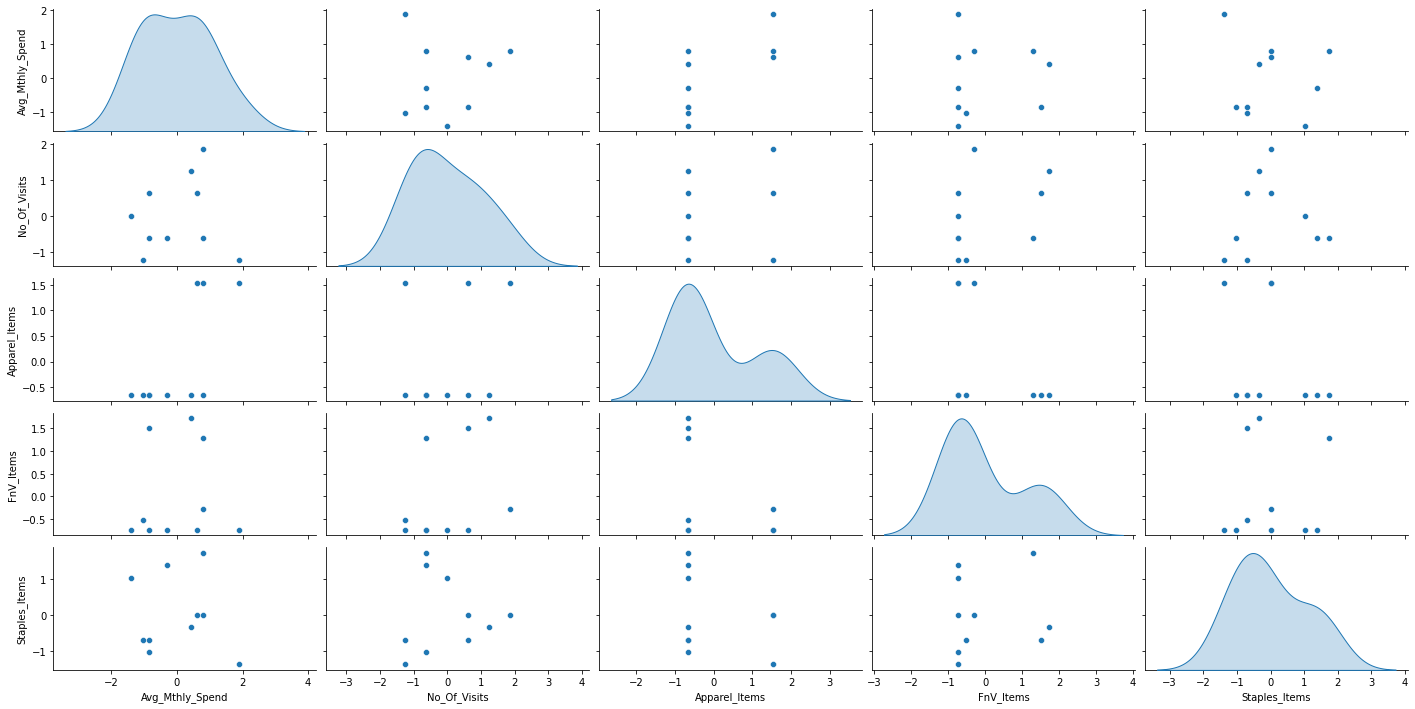

In [9]:
sns.pairplot(dfScaled,height=2,aspect=2,diag_kind='kde')

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
m=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')

In [17]:
m.fit(dfScaled)

AgglomerativeClustering(linkage='average')

In [19]:
dfattr['labels']=m.labels_
dfattr.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,1
1,7000,3,0,10,9,0
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,0
5,4000,3,0,1,8,0
6,2500,5,0,11,2,0
7,2500,3,0,1,1,0
8,2000,2,0,2,2,0
9,1000,4,0,1,7,0


In [20]:
df=dfattr.groupby(['labels'])

In [21]:
df.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,3571.428571,3.714286,0.0,5.428571,4.571429
1,7833.333333,4.666667,1.0,1.666667,2.666667


In [32]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

In [24]:
from scipy.spatial.distance import pdist

In [25]:
z=linkage(dfScaled,metric='euclidean',method='average')
c,df=cophenet(z,pdist(dfScaled))
c

0.8681149436293064

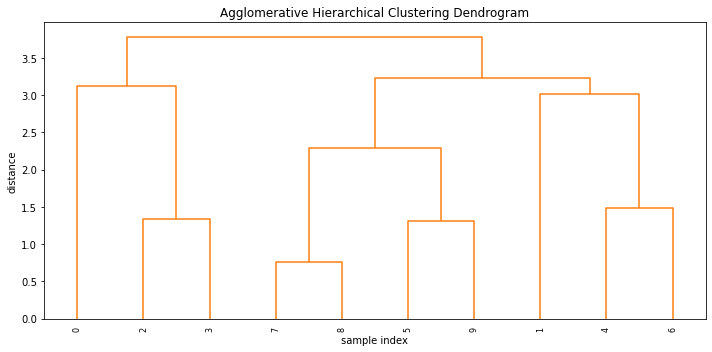

In [33]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=90,color_threshold=40,leaf_font_size=8.)
plt.tight_layout()

In [35]:
z=linkage(dfScaled,metric='euclidean',method='complete')
c,df=cophenet(z,pdist(dfScaled))
c

0.8606955190809153

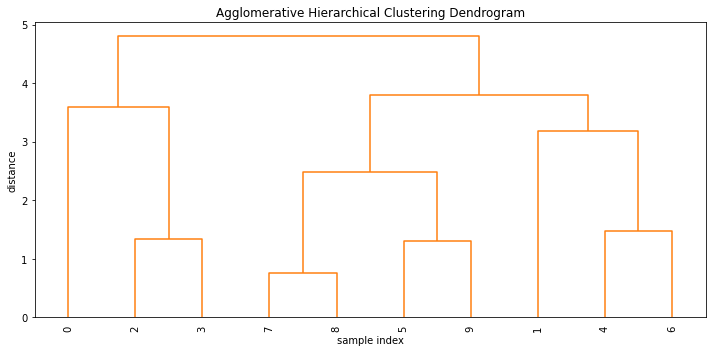

In [36]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=90,color_threshold=40,leaf_font_size=10.)
plt.tight_layout()

In [37]:
z=linkage(dfScaled,metric='euclidean',method='ward')
c,df=cophenet(z,pdist(dfScaled))
c

0.8453818941339526

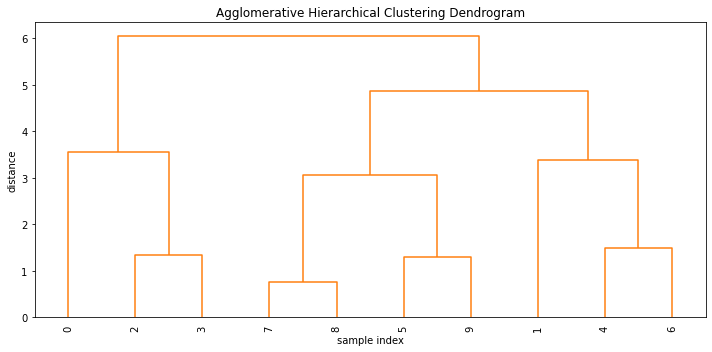

In [38]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=90.,color_threshold=40,leaf_font_size=10.)
plt.tight_layout()